In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault)
from sklearn.manifold import MDS
import math
from sklearn.metrics import normalized_mutual_info_score
import scipy.io
import numpy as np
from scipy import stats
import mat73

# #%% dataloader
#mat_data  = mat73.loadmat('/Users/sonmjack/Downloads/simon_paper/data_fam1novfam1_timeseries.mat')
# age = mat_data['ageMOS']
# mask = mat_data['masks'][:,:,:]
# be_f = mat_data['expname'][:]
# ex_index = mat_data['expname'][:]
# #spike_sum = mat_data['nov_spikes']
# spike_sum = mat_data['fam1_spikes']
# include = mat_data['include']
# with open('/Users/sonmjack/Downloads/simon_paper/fam1_neuron_list_age2.pkl', 'wb') as file:
#     pickle.dump(neuron_spike, file)

In [2]:
import random
import matplotlib.colors as mcolors

Color_Code2=["red","orange","pink","olive","cyan","black","yellow","green","brown","gray","tomato","violet","yellowgreen","y","crimson","darkgoldenrod","darkmagenta","indigo","darkred","darkkhaki","orangered",'aqua','aquamarine','azure','beige','bisque','black','blanchedalmond','blue','blueviolet','brown','burlywood','cadetblue','chartreuse','chocolate','coral','cornflowerblue','cornsilk','crimson','cyan','darkblue','darkcyan','darkgoldenrod','darkgray','darkkhaki','darkolivegreen','darkorange','darkorchid','darkred','darkseagreen','darkslateblue','darkslategray','darkturquoise','darkviolet','deeppink','deepskyblue','dimgray','dodgerblue','firebrick','floralwhite','forestgreen','fuchsia','gainsboro','ghostwhite','goldenrod','greenyellow','honeydew','hotpink','indianred','indigo','ivory','khaki','lavender','lavenderblush','lawngreen','lemonchiffon','lightblue','lightcoral','lightcyan','lightgoldenrodyellow','lightgreen','lightgray','lightpink','lightsalmon','lightseagreen','lightskyblue','lightslategray','lightsteelblue','lightyellow']

list_color=[]
for color in mcolors.CSS4_COLORS:
    list_color.append(color)
random.shuffle(list_color)
Color_Code1=[*Color_Code2, *list_color]
Color_Code=[*Color_Code1, *list_color]
non_zero_indices_per_row = []

def Connector(Q):
    D = nx.to_networkx_graph(Q,create_using=nx.DiGraph())
    Isolate_list=list(nx.isolates(D))
    if len(Isolate_list)>0:
        for i in Isolate_list:
            if i==0:
                Q[i+1,i]=0.0001
            else:
                Q[i-1,i]=0.0001
    del D
    return Q
## Load age 2
mat_trigger = np.load('/Users/sonmjack/Downloads/simon_paper/shengyuan_trigger_fam1.npy')
import pickle
with open('/Users/sonmjack/Downloads/simon_paper/fam1_neuron_list_age2.pkl', 'rb') as file:
    neuron_spike_young = pickle.load(file)
# with open('/Users/sonmjack/Downloads/simon_paper/fam1_ex_index_age2.pkl', 'rb') as file:
#     ex_index = pickle.load(file)
with open('/Users/sonmjack/Downloads/simon_paper/fam1_include_list_age2.pkl', 'rb') as file:
    include_list_young = pickle.load(file)
with open('/Users/sonmjack/Downloads/simon_paper/fam1_old_include_list_age2.pkl', 'rb') as file:
    include_list_old = pickle.load(file)   
with open('/Users/sonmjack/Downloads/simon_paper/dynamic_list_fam_age2_version2.pkl', 'rb') as file:
    dy_list_2 = pickle.load(file)
## Load age 10
with open('/Users/sonmjack/Downloads/simon_paper/fam1_neuron_list_age10.pkl', 'rb') as file:
    neuron_spike_old = pickle.load(file)
    
with open('/Users/sonmjack/Downloads/simon_paper/fam1_df_f_list_age2.pkl', 'rb') as file:
    neuron_time_list = pickle.load(file)   
with open('/Users/sonmjack/Downloads/simon_paper/mask_fam1.pkl', 'rb') as file:
    mask = pickle.load(file)    
    
be_data = scipy.io.loadmat('/Users/sonmjack/Downloads/simon_paper/data_fam1novfam1_trackdata.mat')
import h5py
type_array = h5py.File('/Users/sonmjack/Downloads/simon_paper/data_fam1novfam1_timeseries.mat')

gene = type_array ['genotype'][:,:].T
# mat_label = np.zeros((gene.shape[0],4))
# be_phi_sum = be_data['nov_phi']
be_phi_sum = be_data['fam1_phi']
be_x = be_data['fam1_x']
be_y = be_data['fam1_y']
be_time = be_data['fam1_time']
be_speed = be_data['fam1_speed']

In [3]:
include_list = []
be_x_list_young = []
be_y_list_young = []
be_time_list_young = []
be_speed_list_young = []
be_phi_list_young = [] 
for i in range(10,46,2):#0, len(mat_trigger), 2
    
    if i == len(mat_trigger):
        break
    if i == 18:
        pass
    else:
        be_x_list_young.append(be_x[int(i/2),0])
        be_y_list_young.append(be_y[int(i / 2), 0])
        be_time_list_young.append(be_time[int(i / 2), 0])
        be_speed_list_young.append(be_speed[int(i / 2), 0])
        be_phi_list_young.append(be_phi_sum[int(i / 2), 0])
        # include_i = include[int(mat_trigger[i,0]):int(mat_trigger[i + 1,0])]
        # include_list.append(include_i)
        # 索引原始的be_list
# with open('/Users/sonmjack/Downloads/simon_paper/fam1_include_list_age2.pkl', 'wb') as file:
#     pickle.dump(include_list, file)
be_x_list_old = []
be_y_list_old  = []
be_time_list_old  = []
be_speed_list_old  = []
be_phi_list_old  = [] 
for i in range(0,10,2):#0, len(mat_trigger), 2

    if i == len(mat_trigger):
        break
    if i == 18:
        pass
    else:
        be_x_list_old.append(be_x[int(i/2),0])
        be_y_list_old.append(be_y[int(i / 2), 0])
        be_time_list_old.append(be_time[int(i / 2), 0])
        be_speed_list_old.append(be_speed[int(i / 2), 0])
        be_phi_list_old.append(be_phi_sum[int(i / 2), 0])
        
#         include_i = include[int(mat_trigger[i,0]):int(mat_trigger[i + 1,0])]
#         include_list.append(include_i)
#         #索引原始的be_list
# with open('/Users/sonmjack/Downloads/simon_paper/fam1_old_include_list_age2.pkl', 'wb') as file:
#     pickle.dump(include_list, file)
del be_x, be_data,  be_y, be_time, be_speed, be_phi_sum

In [ ]:
def Spike_Shuffeler(Spike_Train):
    if len(Spike_Train) > 0:
        first = Spike_Train[0]
        last = Spike_Train[-1]

        Dif_list = []
        for i in range(len(Spike_Train) - 1):
            Dif_list.append(Spike_Train[i + 1] - Spike_Train[i])

        random.shuffle(Dif_list)
        Spike_Train_shuf = []
        Accomulation = first
        for i in range(len(Spike_Train) - 1):
            Spike_Train_shuf.append(Accomulation)
            Accomulation = Accomulation + Dif_list[i]
        Spike_Train_shuf.append(Accomulation)
    else:
        Spike_Train_shuf = []
    return Spike_Train_shuf


def Strength_computer(Spike_train, i, j, tau):
    Spike_train[int(j)].sort()
    Spike_Train_B = [*set(Spike_train[int(i)])]
    Spike_Train_B.sort()
    B = Spike_Shuffeler(Spike_Train_B)

    Spike_train[int(i)].sort()
    Spike_Train_A = [*set(Spike_train[int(j)])]
    Spike_Train_A.sort()
    A_i = Spike_Shuffeler(Spike_Train_A)
    A = np.append(-1000, A_i)

    f = [];
    f_null = [];

    N_B = len(B)
    N_A = len(A_i)

    if N_A * N_B == 0:
        S_AB = 0
    else:
        N_max_AB = max(N_A, N_B)
        t = 0
        A_last = 0
        for s in range(int(B[-1])):
            while (A[t] <= s and t < N_A):
                t += 1;
            t -= 1
            A_last = A[t];
            f_null.append(math.exp(-(s - A_last) / tau));
        t = 0
        A_last = 0
        for s in range(N_B):
            while (A[t] <= B[s] and t < N_A):
                t += 1;
            t -= 1
            A_last = A[t];
            f.append(math.exp(-(B[s] - A_last) / tau));
        S_AB = max(np.sum((f - np.mean(f_null)) / (1 - np.mean(f_null))) / N_max_AB, 0)
    return S_AB


this case
this case
this case


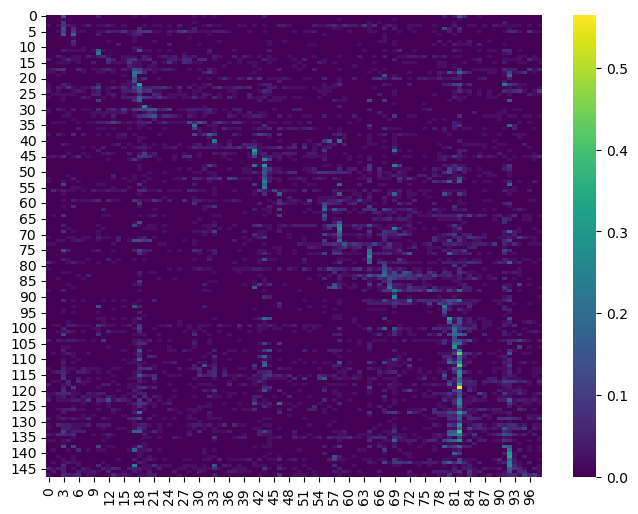

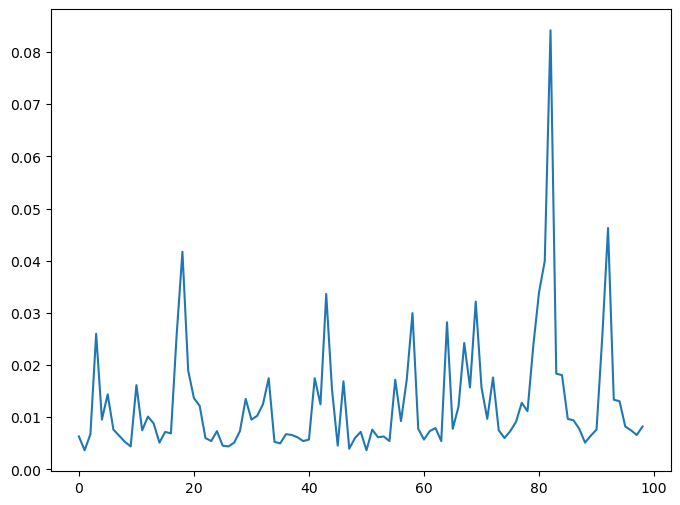

In [4]:
import numpy as np 

index = 10
time_data = be_time_list_young[index][:,0]
mouse_position = be_phi_list_young[index][:,0].reshape(1,-1)
df_f = np.array(neuron_time_list[index]) 
spike_data = neuron_spike_young[index]
# plt.plot(spike_data[1,:])
#biary
spike_data[np.where(spike_data != 0)] = 1

include_list =  include_list_young[index]
mask_index = mask[:, :, int(mat_trigger[10+index*2,0]):int(mat_trigger[11+index*2,0])]

if index >3:
    mask_index = mask[:, :, int(mat_trigger[10 + (index+1) * 2, 0]):int(mat_trigger[11 + (index+1) * 2, 0])]
delete_index_list = []

for i in range(spike_data.shape[0]):#sorting之后 再按排序后的数据进行分析，sorting用的是最大部分
    if include_list[i] == False:
        delete_index_list.append(i)
    elif sum(spike_data[i,:]) == 0:
        delete_index_list.append(i)
        print('this case')
        
spike_data = np.delete(spike_data, delete_index_list, axis=0)
mask_index = np.delete(mask_index, delete_index_list, axis=2)
df_f = np.delete(df_f, delete_index_list, axis=0)
max_index_list = []
tuning_curve_list = []
lap_neuron_list = []

crossing_indices = np.where(np.diff(mouse_position) < -300)[1] + 1

# 根据位置索引将位置数据分割成 lap
lap_indices = np.split(np.arange(mouse_position.shape[1]), crossing_indices)
angle_bins = np.linspace(0, 360, num=100)

for i in range(spike_data.shape[0]):
    neuron_activity = spike_data[i,:].reshape(1,-1)
    # 确定小鼠是否完成一圈的位置索引
  # 将 0 到 360 度的范围分成 36 份
    
    # 根据每个角度数据的范围，将神经元的发放位置分割成相应的份额
    lap_neuron_activity = []
    for lap_index in lap_indices:
        lap_activity = []
        for bin_index in range(len(angle_bins) - 1):
            bin_indices = np.where((mouse_position[:,lap_index[0]:lap_index[-1]+1] >= angle_bins[bin_index]) & (mouse_position[:,lap_index[0]:lap_index[-1]+1] < angle_bins[bin_index + 1]))[1]
            neuron_slice = neuron_activity[:,lap_index[0]:lap_index[-1]+1]
            lap_activity.append(np.sum(neuron_slice[:, bin_indices]))
        lap_neuron_activity.append(lap_activity)
    
    lap_neuron_activity = np.array(lap_neuron_activity)
    lap_neuron_list.append(lap_neuron_activity)
    # fig, axes = plt.subplots(2, 1, figsize=(10, 13), gridspec_kw={'height_ratios': [10, 5]})
    # sns.heatmap(lap_neuron_activity, cmap='viridis', vmin=0,ax=axes[0])
    # axes[0].set_xlabel('location (degree)', fontsize=13)
    # axes[0].set_ylabel('lap trail', fontsize=13)
    # axes[0].set_title("Spike train cross different location_No." +f'{i}') 
    
    #In trail level, equal with norm
    tuning_curve = np.mean(lap_neuron_activity, axis=0)
    tuning_curve_list.append(tuning_curve)
    # axes[1].plot(tuning_curve, color='blue')
    # axes[1].set_title("tuning_curve_No." +f'{i}')
    # plt.savefig('/Users/sonmjack/Downloads/age2 result_fam1/neuron_sorting/'+f'mouse{index}_Neuron_'+f'{i}.jpg')
    # plt.close()
    
    max_index_list.append(np.argmax(tuning_curve))
    
ColorCode = []
tuning_curve_new = []
spike_data_new = []
spike_indices_new = []
non_zero_indices_per_row = []
mask_new_list = np.zeros_like(mask_index)
df_f_new = []
lap_list_new = []
for row in spike_data:
     # 找到每行中不为0的元素的列索引
     non_zero_indices = np.where(row != 0)[0]
     # 添加到列表中
     non_zero_indices_per_row.append(list(non_zero_indices))
     
it=0
Nodes = range(len(tuning_curve_list))
for i in range(max(max_index_list)+1):
    for m,j in zip(Nodes,range(len(max_index_list))):
        if max_index_list[j]==i:
            tuning_curve_new.append(tuning_curve_list[int(m)])
            spike_data_new.append(spike_data[m,:])
            non_zero_indices_per_row[int(m)].sort()
            spike_indices_new.append(non_zero_indices_per_row[int(m)])
            mask_new_list[:,:,it] = mask_index[:,:,m]
            df_f_new.append(df_f[m])
            lap_list_new.append(lap_neuron_list[m])
            # A_ordered_row[it,:]=Q[j,:]
            it+=1


spike_data_new = np.array(spike_data_new)
mask_new_list = np.array(mask_new_list)
df_f_new = np.array(df_f_new)
# sns.heatmap(tuning_curve_list, cmap='viridis', vmin=0)
plt.figure(figsize=(8, 6))
sns.heatmap(tuning_curve_new, cmap='viridis', vmin=0)

# plt.figure(figsize=(8, 6))
# plt.eventplot(non_zero_indices_per_row)   
# plt.title("Neural spike trains ")
# plt.xlabel('Time',fontsize = 13)
# plt.ylabel('Original Neuron ID',fontsize = 13)
# plt.yticks(fontsize=13)
# max_in_sublists = [max(sublist) for sublist in non_zero_indices_per_row[22:33]]
# overall_max = max(max_in_sublists)
# nearest_5000_multiple = round(overall_max / 5000) * 5000
# plt.xticks(np.arange(0,nearest_5000_multiple, 5000), [str(int(i*5000/30)) for i in range(0, round(overall_max / 5000))],fontsize=13)
plt.figure(figsize=(8, 6))
plt.plot(np.mean(tuning_curve_new, axis=0))
plt.show()
# k =54
# plt.plot(df_f_new[k])
# plt.show()
# plt.plot(spike_data_new[k])
# plt.show()

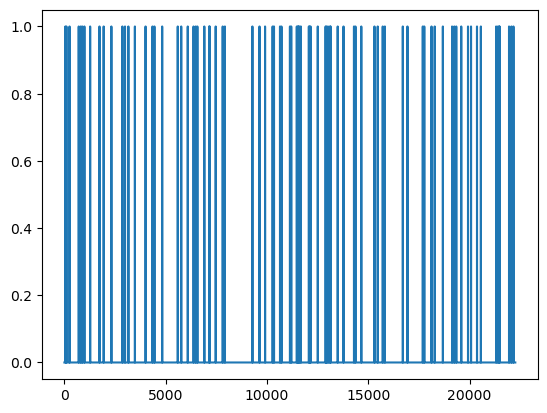

In [5]:
plt.plot(spike_data_new[3,:])
plt.show()
sum = np.sum(spike_data_new[3,:])
sum2 = np.sum(lap_list_new[3])

In [6]:
res_angle_list = []
for i in range(len(lap_neuron_list)):
    for j in range(i+1,len(lap_neuron_list)):
        res_angle = []
        for k in range(len(lap_indices)):
            x, y = lap_neuron_list[i][:,k],  lap_neuron_list[j][:,k]
            res = stats.pearsonr(x, y)
            res = res[0]
            res_angle.append(res)
        res_angle_list.append(res_angle)

/Users/sonmjack/miniconda/envs/cebra/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [59]:
x = np.array([[1, 2, 3, 4, 5, 6, 7],[10, 9, 2.5, 6, 4, 3, 2]])
y = np.array([[1, 2, 3, 4, 5, 6, 7],[10, 9, 2.5, 6, 4, 3, 2]])
#res = stats.pearsonr(x, y)[0]
r1 = np.corrcoef(x,y)


In [ ]:
# correlation_matrix = np.zeros((effect_neurons, effect_neurons))
# for i in range(effect_neurons):

In [ ]:
# add0 
from sklearn import manifold
with open('/Users/sonmjack/Downloads/age2 result_fam1r2/fam1r2_all_df_f.pkl', 'rb') as file:
    All_df_f = pickle.load(file)
mds = MDS(n_components=3, random_state=42)
trail = -3
# lap_index = lap_indices[trail]
#result_mds = mds.fit_transform(df_f_new[:,lap_index[0]:lap_index[-1]+1].T)
result_mds = mds.fit_transform(All_df_f[11].T)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(result_mds[:, 0], result_mds[:, 1], result_mds[:, 2],c= np.arange(0, All_df_f[11].shape[1]))
from sklearn import manifold
# Modified_LLE = manifold.LocallyLinearEmbedding(
#             n_neighbors=10, n_components=2, method='hessian', random_state=42
#         )
# result_LLE = Modified_LLE.fit_transform(np.array(spike_data_new)[:,lap_index[0]:lap_index[-1]+1].T)
# Modified_tsne = manifold.TSNE(
#              n_components=2,random_state=42
#         )
# result_tsne = Modified_tsne.fit_transform(np.array(spike_data_new)[:,lap_index[0]:lap_index[-1]+1].T)
# fig = plt.figure(figsize=(8, 8))
# #ax = fig.add_subplot(111, projection='3d')
# #p = ax.scatter(result_LLE[:, 0], result_LLE[:, 1],result_LLE[:, 2],c=lap_index)
# #p = ax.scatter(result_LLE[:, 0], result_LLE[:, 1],result_LLE[:, 2],c=ColorCode)
# # plt.scatter(result_LLE[:, 0], result_LLE[:, 1],c=ColorCode)
# plt.scatter(result_tsne[:, 0], result_tsne[:, 1],c=lap_index)
# plt.colorbar()

/Users/sonmjack/miniconda/envs/pygneuron/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


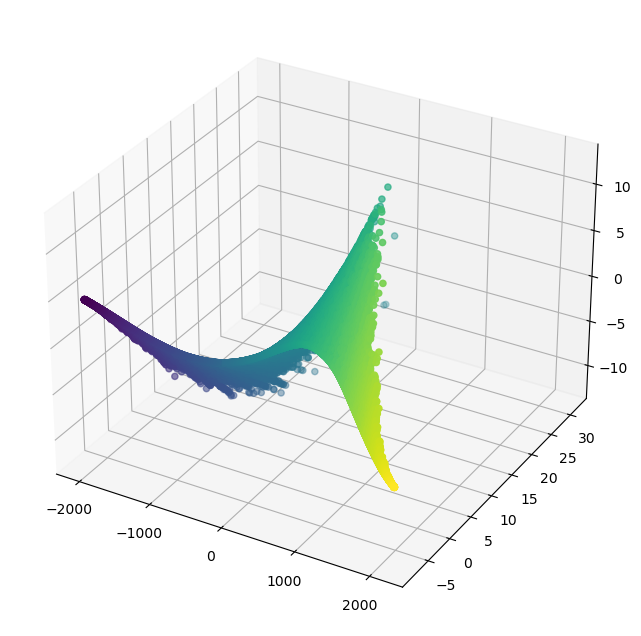

In [21]:
from sklearn import manifold
with open('/Users/sonmjack/Downloads/age2 result_fam1r2/fam1r2_all_df_f.pkl', 'rb') as file:
    All_df_f = pickle.load(file)
Modified_isomap = manifold.Isomap(
             n_components=3, n_neighbors=10,p=1
        )

#result_isomap = Modified_isomap.fit_transform(df_f_new[:,lap_index[0]:lap_index[-1]+1].T)
result_isomap = Modified_isomap.fit_transform(All_df_f[11].T)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(result_isomap[:, 0], result_isomap[:, 1],result_isomap[:, 2],c = np.arange(0, All_df_f[11].shape[1]))
#p = ax.scatter(result_LLE[:, 0], result_LLE[:, 1],result_LLE[:, 2],c=ColorCode)
# plt.scatter(result_LLE[:, 0], result_LLE[:, 1],c=ColorCode)
# plt.scatter(result_isomap[:, 0], result_isomap[:, 1],c=lap_index)
# plt.colorbar()

In [40]:
te = df_f_new[:,lap_index[0]:lap_index[-1]+1]

Text(0.5, 1.0, 'Community beasd on real data')

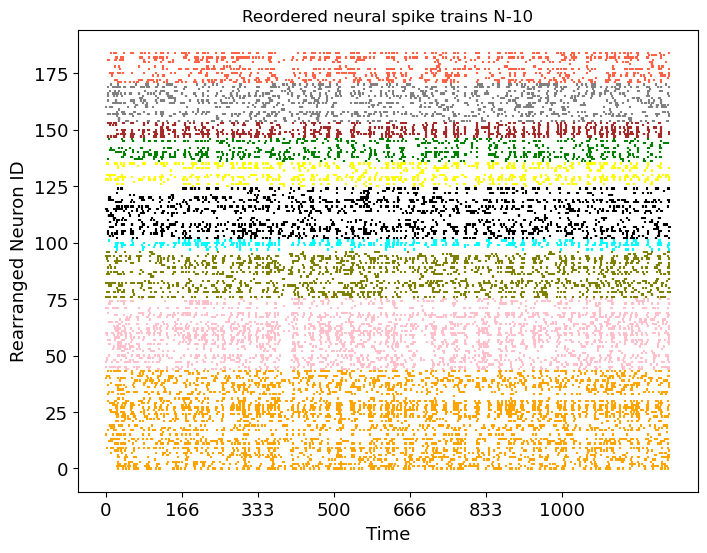

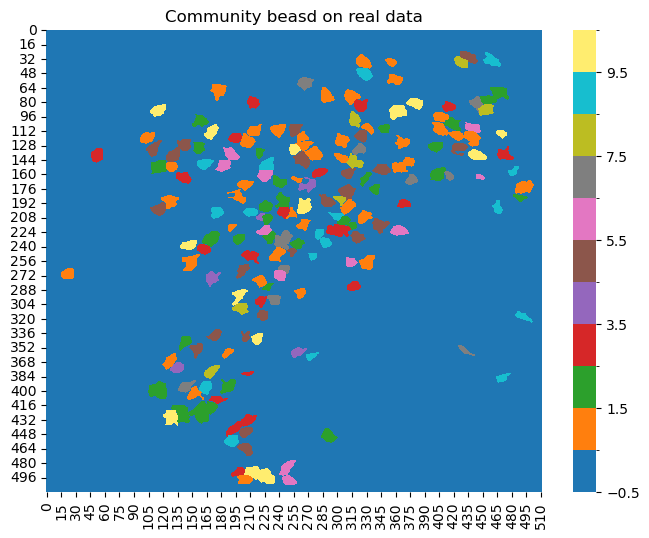

In [56]:
bins = np.arange(0, 110, 10)  # 从0到100，间隔为10

# 将向量中的元素按照区间划分并贴上标签
max_index_label = np.digitize(max_index_list, bins)

it=0
spike_indices_bin = []
ColorCode = []
Nodes = range(len(tuning_curve_list))
for i in range(max(max_index_label)+1):
    for m,j in zip(Nodes,range(len(max_index_label))):
        if max_index_label[j]==i:
            non_zero_indices_per_row[int(m)].sort()
            spike_indices_bin.append(non_zero_indices_per_row[int(m)])
            ColorCode.append(Color_Code[i])
            it+=1           

plt.figure(figsize=(8, 6))
plt.eventplot(spike_indices_bin, color=ColorCode)   

plt.title("Reordered neural spike trains " + f'N-{max(max_index_label)}')
plt.xlabel('Time',fontsize = 13)
plt.ylabel('Rearranged Neuron ID',fontsize = 13)
plt.yticks(fontsize=13)
max_in_sublists = [max(sublist) for sublist in spike_indices_bin[22:33]]
overall_max = max(max_in_sublists)
nearest_5000_multiple = round(overall_max / 5000) * 5000
plt.xticks(np.arange(0,nearest_5000_multiple, 5000), [str(int(i*5000/30)) for i in range(0, round(overall_max / 5000))],fontsize=13)

plt.figure(figsize=(8, 6))
from matplotlib.colors import BoundaryNorm
pic = np.zeros((512, 512))
for i in range(mask_index.shape[2]):
    index_row = np.where(mask_index[:, :, i] == True)[0]
    index_con = np.where(mask_index[:, :, i] == True)[1]
    for j in range(len(index_row)):
            pic[index_row[j], index_con[j]] = max_index_label[i]
#cmap = sns.diverging_palette(220, 20, as_cmap=True)
import seaborn as sns
import matplotlib.colors as colors

#这里和上面颜色一致
tab10_colors = plt.cm.tab10(np.linspace(0, 1, 10))
extra_colors = plt.cm.Set3(np.linspace(0, 1, 2)) 
all_colors = np.vstack((tab10_colors, extra_colors[:2]))  
custom_cmap = colors.ListedColormap(all_colors)


bounds = np.arange(-0.5, 11.5)

norm = BoundaryNorm(bounds, custom_cmap.N)
sns.heatmap(pic,  cmap=custom_cmap, norm=norm)
plt.title('Community beasd on real data')

In [106]:
np.save('dy_d_young_0',dy_d)

In [ ]:
import math
from joblib import Parallel, delayed
import random


def Spike_Shuffeler(Spike_Train):
    if len(Spike_Train) > 0:
        first = Spike_Train[0]
        last = Spike_Train[-1]

        Dif_list = []
        for i in range(len(Spike_Train) - 1):
            Dif_list.append(Spike_Train[i + 1] - Spike_Train[i])

        random.shuffle(Dif_list)
        Spike_Train_shuf = []
        Accomulation = first
        for i in range(len(Spike_Train) - 1):
            Spike_Train_shuf.append(Accomulation)
            Accomulation = Accomulation + Dif_list[i]
        Spike_Train_shuf.append(Accomulation)
    else:
        Spike_Train_shuf = []
    return Spike_Train_shuf


def Strength_computer(Spike_train, i, j, tau):
    Spike_train[int(j)].sort()
    Spike_Train_B = [*set(Spike_train[int(i)])]
    Spike_Train_B.sort()
    B = Spike_Shuffeler(Spike_Train_B)

    Spike_train[int(i)].sort()
    Spike_Train_A = [*set(Spike_train[int(j)])]
    Spike_Train_A.sort()
    A_i = Spike_Shuffeler(Spike_Train_A)
    A = np.append(-1000, A_i)

    f = [];
    f_null = [];

    N_B = len(B)
    N_A = len(A_i)

    if N_A * N_B == 0:
        S_AB = 0
    else:
        N_max_AB = max(N_A, N_B)
        t = 0
        A_last = 0
        for s in range(int(B[-1])):
            while (A[t] <= s and t < N_A):
                t += 1;
            t -= 1
            A_last = A[t];
            f_null.append(math.exp(-(s - A_last) / tau));
        t = 0
        A_last = 0
        for s in range(N_B):
            while (A[t] <= B[s] and t < N_A):
                t += 1;
            t -= 1
            A_last = A[t];
            f.append(math.exp(-(B[s] - A_last) / tau));
        S_AB = max(np.sum((f - np.mean(f_null)) / (1 - np.mean(f_null))) / N_max_AB, 0)
    return S_AB


tau = 1
dy_list = []
#这里把数据给破坏了
  #len(neuron_index)

num_features = spike_data.shape[0]
dy_d = np.zeros((num_features, num_features))
for m in range(num_features):
    for n in range(num_features):
        dy_d[m, n] = Strength_computer(spike_indices_new, m, n, tau)
#dy_d[np.isnan(dy_d)] = 0
print('Finished' + f'{index}')
dy_list.append(dy_d)

In [ ]:
import networkx as nx
from scipy import sparse
A = dy_d
N = A.shape[0]
np.fill_diagonal(A, 0)
# print(max(A[:,4]))
# A=np.where(A > 0.09, 1, 0)
k = 10

# W.sort(reverse=True)
B1 = np.zeros((N, N))
for i in range(N):
    W = sorted(A[i, :], reverse=True)
    #     print( W[k])
    B1[i, :] = np.where(A[i, :] > W[k], 1, 0)

# B=np.multiply(B1,A)
# print(W[k])
# print(A[20,1:20])
# print(B[20,1:20])


C1 = np.zeros((N, N))
for i in range(N):
    W = sorted(A[:, i], reverse=True)
    #     print( W[k])
    C1[:, i] = np.where(A[:, i] > W[k], 1, 0)
# C=np.multiply(C1,A)
Q1 = B1 + C1
Q2 = np.where(Q1 > .9, 1, 0)

Q = np.multiply(Q2, A)
# del A
del B1
del C1
del Q1
del Q2
Connector(Q)
D = nx.to_networkx_graph(Q, create_using=nx.DiGraph())
D.number_of_edges()

# adjacency = nx.to_scipy_sparse_array(A)
import networkx as nx
import scipy.sparse as sp
import pygenstability as pgs
import scipy.sparse as sp

adjacency = sp.csr_matrix(Q)
test = sp.csgraph.connected_components(adjacency)
all_results = pgs.run(adjacency,
                      min_scale=-1.5,
                      max_scale=1.5,
                      n_scale=200,
                      n_tries = 600,
                      constructor="directed")
all_results = pgs.identify_optimal_scales(all_results, kernel_size=14, window_size=14)
_ = pgs.plot_scan(all_results)
plt.show()



In [ ]:
with open('/Users/sonmjack/Downloads/simon_paper/markov/fam1_Markov_list_age2_'+ str(index) +'.pkl', 'wb') as f:
    pickle.dump(all_results, f)
t_opt = 2
selected_partitions = all_results['selected_partitions']
Community = all_results['community_id'][selected_partitions[-t_opt]]


neuralData = []
ColorCode = []

it = 1
Nodes = range(len(spike_indices_new))
for i in range(max(Community) + 1):
    for m, j in zip(Nodes, range(N)):
        if Community[j] == i:
            spike_indices_new[int(m)].sort()
            neuralData.append(spike_indices_new[int(m)])
            ColorCode.append(Color_Code[i])
            # A_ordered_row[it,:]=Q[j,:]
            it += 1
# it=0
# for i in range(max(Community)+1):
#     for m,j in zip(Nodes,range(N)):
#         if Community[j]==i:
#             A_ordered[:,it]=A_ordered_row[:,j]
#             it+=1
plt.eventplot(neuralData, color=ColorCode)
# plot.xlim([8000,9000])
# plot.title('Spike raster plot')
# plt.title(r"%s,  $N_g=%d$" % (data[l],max(Community)+1), fontweight ='bold',)
# plt.title(r"%s,  $S_%d$,  $N_c=%d$" % (data[l],t_opt,max(Community)+1),fontsize = 22)
plt.title("Reordered neural spike trains " + f'N-{max(Community) + 1}')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Rearranged Neuron ID', fontsize=13)
plt.yticks(fontsize=13)


max_in_sublists = [max(sublist) for sublist in neuralData[22:33]]

overall_max = max(max_in_sublists)
nearest_5000_multiple = round(overall_max / 5000) * 5000
plt.xticks(np.arange(0,nearest_5000_multiple, 5000), [str(int(i*5000/30)) for i in range(0, round(overall_max / 5000))],fontsize=13)
plt.show()


from matplotlib.colors import BoundaryNorm
pic = np.zeros((512, 512))
for i in range(mask_new_list.shape[2]):
    index_row = np.where(mask_new_list[:, :, i] == True)[0]
    index_con = np.where(mask_new_list[:, :, i] == True)[1]
    for j in range(len(index_row)):
        if Community[i] == 0:
            pic[index_row[j], index_con[j]] = np.max(Community) + 1
        else:
            pic[index_row[j], index_con[j]] = Community[i]
#cmap = sns.diverging_palette(220, 20, as_cmap=True)
import seaborn as sns
import matplotlib.colors as colors

tab10_colors = plt.cm.tab10(np.linspace(0, 1, 10))
extra_colors = plt.cm.Set3(np.linspace(0, 1, 1)) 
all_colors = np.vstack((tab10_colors, extra_colors[:1]))  
custom_cmap = colors.ListedColormap(all_colors)


bounds = np.arange(-0.5, 10.5)

norm = BoundaryNorm(bounds, custom_cmap.N)


sns.heatmap(pic,  cmap=custom_cmap, norm=norm)
plt.title('Community beasd on real data')


In [ ]:
import plotly.graph_objects as go  # pragma: no cover
from plotly.offline import plot  # pragma: no cover
import sys

def plot_sankey(
    all_results,
    optimal_scales=True,
    live=False,
    filename="fig1.png",
    scale_index=None,
):  # pragma: no cover
    """Plot Sankey diagram of communities accros scale (plotly only).
    Args:
        all_results (dict): results from run function
        optimal_scales (bool): use optimal scales or not
        live (bool): if True, interactive figure will appear in browser
        filename (str): filename to save the plot
        scale_index (bool): plot scale of indices
    """
    sources = []
    targets = []
    values = []
    shift = 0

    if not scale_index:
        all_results["community_id_reduced"] = all_results["community_id"]
    else:
        all_results["community_id_reduced"] = [all_results["community_id"][i] for i in scale_index]

    community_ids = all_results["community_id_reduced"]
    if optimal_scales and ("selected_partitions" in all_results.keys()):
        community_ids = [community_ids[u] for u in all_results["selected_partitions"]]

 
# Community=all_results['community_id'][selected_partitions[-t_opt]]

    for i in range(len(community_ids) - 1):
        community_source = np.array(community_ids[i])
        community_target = np.array(community_ids[i + 1])
        source_ids = set(community_source)
        target_ids = set(community_target)
#         print(target_ids)
        for source in source_ids:
            for target in target_ids:
                value = sum(community_target[community_source == source] == target)
#                 print(community_target[community_source == source] == target)
                if value > 0:
                    values.append(value)
                    sources.append(source + shift)
                    targets.append(target + len(source_ids) + shift)
        shift += len(source_ids)

    layout = go.Layout(autosize=True)
    fig = go.Figure(
        data=[
            go.Sankey(
                node={
                    "pad": 1,
                    "thickness": 1,
                    "line": {"color": "black", "width": 0.0},
                },
                link={"source": sources, "target": targets, "value": values},
            )
        ],
        layout=layout,
    )

    plot(fig, filename=filename)
#     fig.update_layout(
#         title=data,
# #         xaxis_title="X Axis Title",
# #         yaxis_title="Y Axis Title",
# #         legend_title="Legend Title",
# #         font=dict(
# #             family="Courier New, monospace",
# #             size=18,
# #             color="RebeccaPurple")
#     )
    fig.update_layout(showlegend=False)
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)
    
    Scale_enumerate=[r'$S_{%s}$' % (len(community_ids)-i)  for i in range(len(community_ids))]
    for x_coordinate, column_name in enumerate(Scale_enumerate):
        fig.add_annotation(
              x=x_coordinate,#Plotly recognizes 0-5 to be the x range.

              y=1.075,#y value above 1 means above all nodes
              xref="x",
              yref="paper",
              text=column_name,#Text
              showarrow=False,
              font=dict(
                  family="Tahoma",
                  size=16,
                  color="black"
                  ),
              align="left",
              )
    fig.write_image(filename)
    
#     if live:
#         fig.show()

#     return fig

plot_sankey(
    all_results,
    optimal_scales=True,
    live=False,
    filename='Sankey.png' ,
    scale_index=None,
)

# last version

In [ ]:
# for i in range(spike_count.shape[0]):
#     if i  == spike_count.shape[0]:
#         break
#     elif sum(spike_count[i]) == 0:
#         spike_count = np.delete(spike_count, i, axis=0)
#         spike_data = np.delete(spike_data, i, axis=0)
# effect_neurons = spike_count.shape[0]     
# correlation_matrix = np.zeros((effect_neurons, effect_neurons))
# for i in range(effect_neurons):
    for j in range(i+1, effect_neurons):
        neuron_i_mean_corrected = (spike_count[i] - np.mean(spike_count[i]))/np.var(spike_count[i])
        neuron_j_mean_corrected = (spike_count[j] - np.mean(spike_count[j]))/np.var(spike_count[j])
#         correlation = np.corrcoef(neuron_i_mean_corrected, neuron_j_mean_corrected)[0, 1]
#         correlation_matrix[i, j] = correlation
#         correlation_matrix[j, i] = correlation
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)  
# plt.figure(figsize=(8, 6))
sns.heatmap(spike_count, cmap='coolwarm', center=0) 
correlation_matrix1 = np.zeros((effect_neurons, effect_neurons))
for i in range(effect_neurons):
    for j in range(i+1, effect_neurons):

        correlation = np.corrcoef(spike_count[i], spike_count[j])[0, 1]
        correlation_matrix1[i, j] = correlation
        correlation_matrix1[j, i] = correlation
# # sns.heatmap(correlation_matrix1, cmap='coolwarm', center=0)
# # different_elements = (correlation_matrix1 != correlation_matrix).astype(int)
# # from sklearn.metrics.pairwise import cosine_similarity
# # cosine_similarity(correlation_matrix1.flatten().reshape(1, -1), correlation_matrix.flatten().reshape(1, -1))[0, 0]
# noise correlation
index = 3
time_data = be_time_list_young[index][:,0]
fai_data = be_phi_list_young[index][:,0]
spike_data = neuron_spike_young[index]
# 
# np.save('/Users/sonmjack/Downloads/simon_paper/example data/spike_trains_wild_type_fam1.npy',spike_data)
# np.save('/Users/sonmjack/Downloads/simon_paper/example data/fai_wild_type_fam1.npy',fai_data)
# np.save('/Users/sonmjack/Downloads/simon_paper/example data/time_wild_type_fam1.npy',time_data)

neural_trail_data = []
k=0
for i in range(len(fai_data)):
    if i == len(fai_data)-1:
        pass
    elif fai_data[i] > 350 and fai_data[i+1] <20:
        k=k+1
        neural_trail_data.append(spike_data[:,index:i])
num_neurons = spike_data.shape[0]
spike_count = np.zeros((num_neurons,len(neural_trail_data)))
for i in range(len(neural_trail_data)):
    spike_train = neural_trail_data[i]
    for j in range(num_neurons):
        spike_count[j,i] = np.count_nonzero(spike_train[j,:])
for i in range(spike_count.shape[0]):
    if i  == spike_count.shape[0]:
        break
    elif sum(spike_count[i]) == 0:
        spike_count = np.delete(spike_count, i, axis=0)
        spike_data = np.delete(spike_data, i, axis=0)
effect_neurons = spike_count.shape[0]     
correlation_matrix = np.zeros((effect_neurons, effect_neurons))
for i in range(effect_neurons):
    for j in range(i+1, effect_neurons):
        neuron_i_mean_corrected = (spike_count[i] - np.mean(spike_count[i]))/np.var(spike_count[i])
        neuron_j_mean_corrected = (spike_count[j] - np.mean(spike_count[j]))/np.var(spike_count[j])
        correlation = np.corrcoef(neuron_i_mean_corrected, neuron_j_mean_corrected)[0, 1]
        correlation_matrix[i, j] = correlation
        correlation_matrix[j, i] = correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)  
plt.figure(figsize=(8, 6))
sns.heatmap(spike_count, cmap='coolwarm', center=0) 
# correlation_matrix1 = np.zeros((effect_neurons, effect_neurons))
# for i in range(effect_neurons):
#     for j in range(i+1, effect_neurons):
#         
#         correlation = np.corrcoef(spike_count[i], spike_count[j])[0, 1]
#         correlation_matrix1[i, j] = correlation
#         correlation_matrix1[j, i] = correlation
# sns.heatmap(correlation_matrix1, cmap='coolwarm', center=0)
# different_elements = (correlation_matrix1 != correlation_matrix).astype(int)
# from sklearn.metrics.pairwise import cosine_similarity
# cosine_similarity(correlation_matrix1.flatten().reshape(1, -1), correlation_matrix.flatten().reshape(1, -1))[0, 0]

In [ ]:
sns.heatmap(dy_list_2[index], cmap='coolwarm', center=0,vmax = 0.01)

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(x=spike_count[1], y= spike_count[51], color='blue', line_kws={'color': 'red'})
correlation = np.corrcoef(spike_count[1], spike_count[51])[0, 1]
plt.title(f'Neuron Firing Strength Correlation (r={correlation:.2f})')
plt.xlabel('Neuron 1 Firing Strength')
plt.ylabel('Neuron 2 Firing Strength')
plt.show()

In [ ]:
import networkx as nx
from scipy import sparse
A = correlation_matrix
N = A.shape[0]
np.fill_diagonal(A, 0)
# print(max(A[:,4]))
# A=np.where(A > 0.09, 1, 0)
k = 10

# W.sort(reverse=True)
B1 = np.zeros((N, N))
for i in range(N):
    W = sorted(A[i, :], reverse=True)
    #     print( W[k])
    B1[i, :] = np.where(A[i, :] > W[k], 1, 0)

# B=np.multiply(B1,A)
# print(W[k])
# print(A[20,1:20])
# print(B[20,1:20])


C1 = np.zeros((N, N))
for i in range(N):
    W = sorted(A[:, i], reverse=True)
    #     print( W[k])
    C1[:, i] = np.where(A[:, i] > W[k], 1, 0)
# C=np.multiply(C1,A)
Q1 = B1 + C1
Q2 = np.where(Q1 > .9, 1, 0)

Q = np.multiply(Q2, A)
# del A
del B1
del C1
del Q1
del Q2
Connector(Q)
D = nx.to_networkx_graph(Q, create_using=nx.DiGraph())
D.number_of_edges()

In [ ]:
# adjacency = nx.to_scipy_sparse_array(A)
import networkx as nx
import scipy.sparse as sp
import pygenstability as pgs
import scipy.sparse as sp

adjacency = sp.csr_matrix(Q)
test = sp.csgraph.connected_components(adjacency)
all_results = pgs.run(adjacency,
                      min_scale=-1.5,
                      max_scale=1.5,
                      n_scale=200,
                      n_tries=200,
                      constructor="continuous_normalized")

In [ ]:
all_results = pgs.identify_optimal_scales(all_results,kernel_size=12,window_size=12)
_ = pgs.plot_scan(all_results)
plt.show()

In [ ]:
t_opt=2
selected_partitions=all_results['selected_partitions']
Community=all_results['community_id'][selected_partitions[-t_opt]]

In [ ]:
with open('/Users/sonmjack/Downloads/simon_paper/mask_fam1.pkl', 'rb') as file:
    mask = pickle.load(file)
with open('/Users/sonmjack/Downloads/simon_paper/dynamic_list_fam_age10.pkl', 'rb') as file:
    dy_list_old = pickle.load(file)
with open('/Users/sonmjack/Downloads/simon_paper/dynamic_list_fam_age2_version2.pkl', 'rb') as file:
    dy_list_young = pickle.load(file)

In [ ]:
#AD_old
index = 4
time_data = be_time_list_old[index][:,0]
fai_data = be_phi_list_old[index][:,0]
spike_data = neuron_spike_old[index]
connection_data = dy_list_old[index]

np.save('/Users/sonmjack/Downloads/simon_paper/example data/spike_trains_old_AD_'+f'{index}_'+'fam1.npy',spike_data)
np.save('/Users/sonmjack/Downloads/simon_paper/example data/fai_old_AD_'+f'{index}_'+'fam1.npy',fai_data)
np.save('/Users/sonmjack/Downloads/simon_paper/example data/connection_old_AD_'+f'{index}_'+'fam1.npy',connection_data)
# np.save('/Users/sonmjack/Downloads/simon_paper/example data/time_old_AD_'+f'{index}'+'fam1.npy',time_data)

mask_index = mask[:, :, int(mat_trigger[0+index*2,0]):int(mat_trigger[1+index*2,0])]

np.save('/Users/sonmjack/Downloads/simon_paper/example data/mask_AD_old_'+f'{index}_'+'fam1.npy',mask_index)

In [ ]:
index = 13


time_data = be_time_list_young[index][:,0]
fai_data = be_phi_list_young[index][:,0]
spike_data = neuron_spike_young[index]
connection_data = dy_list_young[index]

np.save('/Users/sonmjack/Downloads/simon_paper/example data/spike_trains_AD_young_'+f'{index}_'+'fam1.npy',spike_data)
np.save('/Users/sonmjack/Downloads/simon_paper/example data/fai_AD_young_'+f'{index}_'+'fam1.npy',fai_data)
np.save('/Users/sonmjack/Downloads/simon_paper/example data/connection_young_AD_'+f'{index}_'+'fam1.npy',connection_data)

mask_index = mask[:, :, int(mat_trigger[10+index*2,0]):int(mat_trigger[11+index*2,0])]

if index >3:
    mask_index = mask[:, :, int(mat_trigger[10 + (index+1) * 2, 0]):int(mat_trigger[11 + (index+1) * 2, 0])]
    
np.save('/Users/sonmjack/Downloads/simon_paper/example data/mask_AD_young_'+f'{index}_'+'fam1.npy',mask_index)

In [ ]:
index = 16


time_data = be_time_list_young[index][:,0]
fai_data = be_phi_list_young[index][:,0]
spike_data = neuron_spike_young[index]
connection_data = dy_list_young[index]

np.save('/Users/sonmjack/Downloads/simon_paper/example data/spike_trains_wild_young'+f'{index}_'+'fam1.npy',spike_data)
np.save('/Users/sonmjack/Downloads/simon_paper/example data/fai_wild_young_'+f'{index}_'+'fam1.npy',fai_data)
np.save('/Users/sonmjack/Downloads/simon_paper/example data/connection_wild_young_'+f'{index}_'+'fam1.npy',connection_data)

mask_index = mask[:, :, int(mat_trigger[10+index*2,0]):int(mat_trigger[11+index*2,0])]

if index >3:
    mask_index = mask[:, :, int(mat_trigger[10 + (index+1) * 2, 0]):int(mat_trigger[11 + (index+1) * 2, 0])]
    
np.save('/Users/sonmjack/Downloads/simon_paper/example data/mask_wild_young'+f'{index}'+'fam1.npy',mask_index)

In [ ]:
plt.plot(fai_data)
#plt.plot(time_data[5000:12000])#特有的远距离震荡

## Behaviour

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation, PillowWriter
# 
# m = 0
# n = 10000
# # 创建时间数据
# time_data = be_time_list[0][m:n,0]
# 
# # 创建圆圈路径
# x_circle = be_x_list[0][m:n,0]
# y_circle = be_y_list[0][m:n,0]
# speed_data = be_speed_list[0][m:n,0]
# 
# 
# 
# # 创建动态路径
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# 
# colors = plt.cm.viridis(speed_data / max(speed_data))
# # 初始化路径
# line, = ax.plot([], [], [], color='blue', alpha=0.8)
# 
# ax.set_zlim(0, max(time_data))
# ax.set_xlim(-140, 140)
# ax.set_ylim(-140, 140)
# # 更新函数
# def update(frame):
#     line.set_data(x_circle[:frame], y_circle[:frame])
#     line.set_3d_properties(time_data[:frame])
# #     colors = plt.cm.viridis(speed_data[frame] / max(speed_data))  # 使用 'viridis' 色彩映射
# #     line.set_color(colors)
# #     current_color = colors[frame]
# #     line.set_color(current_color)
#     return line,
#     
# #%matplotlib notebook
# # 创建动画
# ani = FuncAnimation(fig, update, frames=len(time_data),interval=1, blit=True)
# 
# # writer = PillowWriter(fps=150)
# # ani.save('animation.gif', writer=writer)

In [ ]:
neuralData = []
ColorCode = []

it=0
Nodes = range(len(non_zero_indices_per_row))
for i in range(max(Community)+1):
    for m,j in zip(Nodes,range(N)):
        if Community[j]==i:
            non_zero_indices_per_row[int(m)].sort()
            neuralData.append(non_zero_indices_per_row[int(m)])
            ColorCode.append(Color_Code[i])
            # A_ordered_row[it,:]=Q[j,:]
            it+=1
# it=0
# for i in range(max(Community)+1):
#     for m,j in zip(Nodes,range(N)):
#         if Community[j]==i:
#             A_ordered[:,it]=A_ordered_row[:,j]
#             it+=1

plt.eventplot(neuralData, color=ColorCode)   
# plot.xlim([8000,9000])
# plot.title('Spike raster plot')
# plt.title(r"%s,  $N_g=%d$" % (data[l],max(Community)+1), fontweight ='bold',)
# plt.title(r"%s,  $S_%d$,  $N_c=%d$" % (data[l],t_opt,max(Community)+1),fontsize = 22)

plt.title("Neural spike trains "+f'N-{max(Community)+1}')
plt.xlabel('Time',fontsize = 13)
plt.ylabel('Rearranged Neuron ID',fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(0,40000, 5000), [str(int(i*5000/30)) for i in range(0, 8)],fontsize=13)
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# 
# 
# index = 1
# time_data = be_time_list_young[index][:,0]
# fai_data = be_phi_list_young[index][:,0]
# spike_data = neuron_spike_young[index]
# spike_data[np.where(spike_data != 0)] = 1
# # 
# # np.save('/Users/sonmjack/Downloads/simon_paper/example data/spike_trains_wild_type_fam1.npy',spike_data)
# # np.save('/Users/sonmjack/Downloads/simon_paper/example data/fai_wild_type_fam1.npy',fai_data)
# # np.save('/Users/sonmjack/Downloads/simon_paper/example data/time_wild_type_fam1.npy',time_data)
# num_neurons = spike_data.shape[0]
# neural_trail_data_60 = []
# neural_trail_data_120 = []
# neural_trail_data_180 = []
# neural_trail_data_240 = []
# neural_trail_data_300 = []
# neural_trail_data_360 = []
# neural_trail_all_60 = []
# neural_trail_all_120 = []
# neural_trail_all_180 = []
# neural_trail_all_240 = []
# neural_trail_all_300 = []
# neural_trail_all_360 = []
# ind  = 0
# 
# for i in range(len(fai_data)):
#     if i == len(fai_data)-1:
#         pass
#     elif fai_data[i] > 350 and fai_data[i+1] < 20:
#         neural_trail_all_60.append(neural_trail_data_60)
#         neural_trail_all_120.append(neural_trail_data_120)
#         neural_trail_all_180.append(neural_trail_data_180)
#         neural_trail_all_240.append(neural_trail_data_240)
#         neural_trail_all_300.append(neural_trail_data_300)
#         neural_trail_all_360.append(neural_trail_data_360)
#         
#         neural_trail_data_60 = []
#         neural_trail_data_120 = []
#         neural_trail_data_180 = []
#         neural_trail_data_240 = []
#         neural_trail_data_300 = []
#         neural_trail_data_360 = []
#     elif fai_data[i] >= 0 and fai_data[i] < 60:
#         neural_trail_data_60.append(spike_data[:,i])
#     elif fai_data[i] >= 60 and fai_data[i] < 120:
#         neural_trail_data_120.append(spike_data[:,i])
#     elif fai_data[i] >= 120 and fai_data[i] < 180:  
#         neural_trail_data_180.append(spike_data[:,i])
#     elif fai_data[i] >= 180 and fai_data[i] < 240: 
#         neural_trail_data_240.append(spike_data[:,i])
#     elif fai_data[i] >= 240 and fai_data[i] < 300: 
#         neural_trail_data_300.append(spike_data[:,i]) 
#     elif fai_data[i] >= 300 and fai_data[i] < 360: 
#         neural_trail_data_360.append(spike_data[:,i]) 
#         
# num_neurons = spike_data.shape[0]
# spike_count_360 = np.zeros((num_neurons,len(neural_trail_all_360)))
# for i in range(len(neural_trail_all_360)):
#     neural_trail = np.array(neural_trail_all_360[i]).T
#     if np.size(neural_trail) == 0:
#         spike_count_360[:,i] = 0
#     else:
#         for j in range(num_neurons):
#             spike_count_360[j,i] = np.count_nonzero(neural_trail[j,:])
# spike_count_360 =spike_count_360
# 
# sns.heatmap(spike_count_360, cmap='coolwarm', center=0) 
# plt.xlabel('circle step', fontsize=13)
# plt.ylabel('Neuron ID', fontsize=13)
# plt.title("Nubmer of neural spike trains between 0 and 360 degrees, Wild type")     
# plt.show()
# 
# spike_count_60 = np.zeros((num_neurons,len(neural_trail_all_60)))
# for i in range(len(neural_trail_all_60)):
#     neural_trail = np.array(neural_trail_all_60[i]).T
#     if np.size(neural_trail) == 0:
#         spike_count_60[:,i] = 0
#     else:
#         for j in range(num_neurons):
#             spike_count_60[j,i] = np.count_nonzero(neural_trail[j,:])
# spike_count_60 =spike_count_60
# 
# sns.heatmap(spike_count_60, cmap='coolwarm', center=0) 
# plt.xlabel('circle step', fontsize=13)
# plt.ylabel('Neuron ID', fontsize=13)
# plt.title("Nubmer of neural spike trains between 0 and 60 degrees, Wild type")   
# plt.show()

In [ ]:

# neural_trail_data_60 = np.array(neural_trail_data_60).T
# neural_trail_data_120 = np.array(neural_trail_data_120).T
# neural_trail_data_180 = np.array(neural_trail_data_180).T
# neural_trail_data_240 = np.array(neural_trail_data_240).T
# neural_trail_data_300 = np.array(neural_trail_data_300).T
# neural_trail_data_360 = np.array(neural_trail_data_360).T
# # spike_count = np.zeros((num_neurons,len(neural_trail_data)))
# spike_count = np.zeros((num_neurons,6))
# 
# for j in range(num_neurons):
#     spike_count[j,0] = np.count_nonzero(neural_trail_data_60[j,:])
# for j in range(num_neurons):
#     spike_count[j,1] = np.count_nonzero(neural_trail_data_120[j,:])    
# for j in range(num_neurons):
#     spike_count[j,2] = np.count_nonzero(neural_trail_data_180[j,:])  
# for j in range(num_neurons):
#     spike_count[j,3] = np.count_nonzero(neural_trail_data_240[j,:])  
# for j in range(num_neurons):
#     spike_count[j,4] = np.count_nonzero(neural_trail_data_300[j,:])      
# for j in range(num_neurons):
#     spike_count[j,5] = np.count_nonzero(neural_trail_data_360[j,:]) 
# sns.heatmap(spike_count, cmap='coolwarm', center=0)

In [ ]:
# index = 0
# time_data = be_time_list_old[index][:,0]
# fai_data = be_phi_list_old[index][:,0]
# spike_data = neuron_spike_old[index]
# spike_data[np.where(spike_data != 0)] = 1
# # 
# # np.save('/Users/sonmjack/Downloads/simon_paper/example data/spike_trains_wild_type_fam1.npy',spike_data)
# # np.save('/Users/sonmjack/Downloads/simon_paper/example data/fai_wild_type_fam1.npy',fai_data)
# # np.save('/Users/sonmjack/Downloads/simon_paper/example data/time_wild_type_fam1.npy',time_data)
# num_neurons = spike_data.shape[0]
# neural_trail_data_60 = []
# neural_trail_data_120 = []
# neural_trail_data_180 = []
# neural_trail_data_240 = []
# neural_trail_data_300 = []
# neural_trail_data_360 = []
# neural_trail_all_60 = []
# neural_trail_all_120 = []
# neural_trail_all_180 = []
# neural_trail_all_240 = []
# neural_trail_all_300 = []
# neural_trail_all_360 = []
# ind  = 0
# 
# for i in range(len(fai_data)):
#     if i == len(fai_data)-1:
#         pass
#     elif fai_data[i] > 350 and fai_data[i+1] < 20:
#         neural_trail_all_60.append(neural_trail_data_60)
#         neural_trail_all_120.append(neural_trail_data_120)
#         neural_trail_all_180.append(neural_trail_data_180)
#         neural_trail_all_240.append(neural_trail_data_240)
#         neural_trail_all_300.append(neural_trail_data_300)
#         neural_trail_all_360.append(neural_trail_data_360)
#         
#         neural_trail_data_60 = []
#         neural_trail_data_120 = []
#         neural_trail_data_180 = []
#         neural_trail_data_240 = []
#         neural_trail_data_300 = []
#         neural_trail_data_360 = []
#     elif fai_data[i] >= 0 and fai_data[i] < 60:
#         neural_trail_data_60.append(spike_data[:,i])
#     elif fai_data[i] >= 60 and fai_data[i] < 120:
#         neural_trail_data_120.append(spike_data[:,i])
#     elif fai_data[i] >= 120 and fai_data[i] < 180:  
#         neural_trail_data_180.append(spike_data[:,i])
#     elif fai_data[i] >= 180 and fai_data[i] < 240: 
#         neural_trail_data_240.append(spike_data[:,i])
#     elif fai_data[i] >= 240 and fai_data[i] < 300: 
#         neural_trail_data_300.append(spike_data[:,i]) 
#     elif fai_data[i] >= 300 and fai_data[i] < 360: 
#         neural_trail_data_360.append(spike_data[:,i]) 
#         
# num_neurons = spike_data.shape[0]
# spike_count_60 = np.zeros((num_neurons,len(neural_trail_all_60)))
# for i in range(len(neural_trail_all_60)):
#     neural_trail = np.array(neural_trail_all_60[i]).T
#     if np.size(neural_trail) == 0:
#         spike_count_60[:,i] = 0
#     else:
#         for j in range(num_neurons):
#             spike_count_60[j,i] = np.count_nonzero(neural_trail[j,:])
# spike_count_60 =spike_count_60
# 
# sns.heatmap(spike_count_60, cmap='coolwarm', center=0) 
# plt.xlabel('circle step', fontsize=13)
# plt.ylabel('Neuron ID', fontsize=13)
# plt.title("Nubmer of neural spike trains between 0 and 60 degrees")     
# plt.show()
# community = np.load('/Users/sonmjack/Downloads/age10 result_fam1/wild_type_community.npy')
# 
# sorted_indices = np.argsort(community)
# sorted_matrix = spike_count_60[sorted_indices]
# 
# label_0_indices = np.where(community == 0)[0]
# matrix_label_0 = sorted_matrix[label_0_indices]
# 
# sns.heatmap(matrix_label_0, cmap='coolwarm', center=0) 
# plt.xlabel('circle step', fontsize=13)
# plt.ylabel('Neuron ID', fontsize=13)
# plt.title("Nubmer of neural spike trains between 0 and 60 degrees, Community0") 
# plt.show()
# label_1_indices = np.where(community == 1)[0]
# matrix_label_1 = sorted_matrix[label_1_indices]
# 
# sns.heatmap(matrix_label_1, cmap='coolwarm', center=0) 
# plt.xlabel('circle step', fontsize=13)
# plt.ylabel('Neuron ID', fontsize=13)
# plt.title("Nubmer of neural spike trains between 0 and 60 degrees, Community1") 
# plt.show()
# label_2_indices = np.where(community == 2)[0]
# matrix_label_2 = sorted_matrix[label_2_indices]
# 
# sns.heatmap(matrix_label_2, cmap='coolwarm', center=0) 
# plt.xlabel('circle step', fontsize=13)
# plt.ylabel('Neuron ID', fontsize=13)
# plt.title("Nubmer of neural spike trains between 0 and 60 degrees, Community2") 
# plt.show()
# 
# label_3_indices = np.where(community == 9)[0]
# matrix_label_3 = sorted_matrix[label_3_indices]
# 
# sns.heatmap(matrix_label_3, cmap='coolwarm', center=0) 
# plt.xlabel('circle step', fontsize=13)
# plt.ylabel('Neuron ID', fontsize=13)
# plt.title("Nubmer of neural spike trains between 0 and 60 degrees, Community3") 
# plt.show()
# np.max(community)